In [951]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from ydata_profiling import ProfileReport
import sweetviz as sv


 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

In [953]:
df = pd.read_csv("Riyadh_Aqqar_Apartment.csv")

In [955]:
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [875]:
#الواجهة : عبيها بغير معروف 162
# عدد الصالات: 0عبها
# الدور: 74 قيمة فاضية
# 

In [956]:
df.shape

(551, 15)

In [959]:
df.describe()


,عدد الغرف,عدد الصالات,المساحة,مطبخ,مدخل سيارة,مصعد,عمر العقار,مؤثثة,السعر الاجمالي
count,551.000000,541.000000,551.000000,551.000000,551.000000,551.000000,550.000000,551.000000,5.510000e+02
mean,3.029038,1.253235,151.633394,0.735027,0.346642,0.689655,1.385455,0.165154,1.137539e+06
std,0.755026,0.443694,41.423181,0.441720,0.476333,0.463055,2.955740,0.371657,3.315825e+05
min,1.000000,1.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000e+05
25%,3.000000,1.000000,126.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000e+05
50%,3.000000,1.000000,142.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.100000e+06
75%,3.000000,1.000000,169.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.270000e+06
max,6.000000,3.000000,428.000000,1.000000,1.000000,1.000000,13.000000,1.000000,3.500000e+06


In [961]:
df.columns


Index(['نوع العقار', 'المدينة', 'الحي', 'الواجهة', 'عدد الغرف', 'عدد الصالات',
       'عدد الحمامات', 'المساحة', 'مطبخ', 'مدخل سيارة', 'مصعد', 'الدور',
       'عمر العقار', 'مؤثثة', 'السعر الاجمالي'],
      dtype='object')

In [963]:
df.sample(5)

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي
320,شقة,الرياض,حي الملقا,NaN,3,1.0,3,147,1,0,0,علوي,0.0,0,1250000
480,شقة,الرياض,حي النرجس,جنوبية شرقية,2,1.0,2,130,0,0,1,NaN,0.0,0,782000
213,شقة,الرياض,حي الندى,جنوبية شرقية,3,2.0,3,241,1,1,1,3,0.0,0,1429000
468,شقة,الرياض,حي الملقا,NaN,3,1.0,3,196,1,0,0,علوي,0.0,0,1550000
441,شقة,امارة منطقة الرياض,حي الملقا,جنوبية غربية,3,2.0,5+,248,1,0,1,3,0.0,0,1742500


In [886]:
###########################################

In [965]:
df.dtypes

نوع العقار         object
المدينة            object
الحي               object
الواجهة            object
عدد الغرف           int64
عدد الصالات       float64
عدد الحمامات       object
المساحة             int64
مطبخ                int64
مدخل سيارة          int64
مصعد                int64
الدور              object
عمر العقار        float64
مؤثثة               int64
السعر الاجمالي      int64
dtype: object

In [967]:
df.duplicated().sum()

139

In [969]:
df["نوع العقار"]

0      شقة
1      شقة
2      شقة
3      شقة
4      شقة
      ... 
546    شقة
547    شقة
548    شقة
549    شقة
550    شقة
Name: نوع العقار, Length: 551, dtype: object

In [971]:
df[df.duplicated()]

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي
34,شقة,الرياض,حي النرجس,NaN,2,2.0,3,157,1,0,0,أرضي,0.0,0,950000
61,شقة,الرياض,حي النرجس,جنوبية,4,1.0,3,120,1,0,0,أرضي,0.0,0,850000
82,شقة,منطقة الرياض,الرياض,شرقية,3,1.0,2,104,1,1,1,3,7.0,0,715000
91,شقة,الرياض,حي النرجس,جنوبية,2,2.0,3,117,0,0,1,3,0.0,0,899000
92,شقة,الرياض,حي العقيق,شمالية,4,1.0,3,220,1,1,1,3,0.0,0,800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,شقة,الرياض,حي العارض,جنوبية,3,2.0,3,147,1,1,1,NaN,0.0,0,959000
525,شقة,الرياض,حي النرجس,شرقية,3,1.0,4,178,1,0,1,أرضي,0.0,0,900000
527,شقة,منطقة الرياض,الرياض,شمالية,3,1.0,2,104,0,1,1,3,1.0,0,715000
528,شقة,الرياض,حي الربيع,جنوبية,3,1.0,3,114,1,0,1,أرضي,0.0,0,1000000


In [973]:
df.isnull().sum().sort_values(ascending = False)

الواجهة           162
الدور              74
عدد الصالات        10
عمر العقار          1
نوع العقار          0
المدينة             0
الحي                0
عدد الغرف           0
عدد الحمامات        0
المساحة             0
مطبخ                0
مدخل سيارة          0
مصعد                0
مؤثثة               0
السعر الاجمالي      0
dtype: int64

In [975]:
df[df['الواجهة'].isnull()]

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي
2,شقة,الرياض,حي النرجس,NaN,3,1.0,3,145,1,0,1,أرضي,2.0,0,1050000
5,شقة,الرياض,حي الياسمين,NaN,3,1.0,2,118,1,0,1,3,0.0,0,850000
9,شقة,الرياض,حي العقيق,NaN,3,1.0,3,115,0,1,1,NaN,11.0,0,1100000
11,شقة,الرياض,حي النرجس,NaN,2,2.0,3,157,1,0,0,أرضي,0.0,0,950000
13,شقة,الرياض,حي الملقا,NaN,3,1.0,3,140,0,0,1,علوي,0.0,0,1190000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,شقة,الرياض,حي النرجس,NaN,3,2.0,3,167,1,0,1,علوي,0.0,0,1200000
540,شقة,الرياض,حي المروج,NaN,2,1.0,2,120,1,0,1,علوي,11.0,0,800000
546,شقة,الرياض,حي الصحافة,NaN,3,1.0,3,201,1,0,1,علوي,9.0,0,1100000
547,شقة,الرياض,حي المروج,NaN,3,1.0,3,127,1,0,1,3,0.0,1,1600000


In [977]:
df['الواجهة'].fillna('غير معروف', inplace=True)

C:\Users\mosaa\AppData\Local\Temp\ipykernel_30836\2187385762.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['الواجهة'].fillna('غير معروف', inplace=True)


In [979]:
df.isnull().sum().sort_values(ascending = False)

الدور             74
عدد الصالات       10
عمر العقار         1
نوع العقار         0
المدينة            0
الحي               0
الواجهة            0
عدد الغرف          0
عدد الحمامات       0
المساحة            0
مطبخ               0
مدخل سيارة         0
مصعد               0
مؤثثة              0
السعر الاجمالي     0
dtype: int64

In [981]:
df[df['عدد الصالات'].isnull()]

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي
44,شقة,امارة منطقة الرياض,الرياض,غير معروف,1,NaN,4,178,1,0,0,أرضي,2.0,0,1250000
60,شقة,الرياض,حي النرجس,غير معروف,3,NaN,3,131,1,0,0,أرضي,1.0,0,890000
120,شقة,الرياض,حي النرجس,ثلاث شوارع,1,NaN,3,151,1,0,1,أرضي,0.0,0,900000
140,شقة,منطقة الرياض,الرياض,غير معروف,1,NaN,3,151,0,0,0,NaN,0.0,0,896000
178,شقة,الرياض,حي النرجس,ثلاث شوارع,1,NaN,3,151,1,0,1,أرضي,0.0,0,900000
255,شقة,منطقة الرياض,الرياض,غير معروف,1,NaN,3,151,0,0,0,NaN,0.0,0,896000
405,شقة,الرياض,حي النزهة,غربية,3,NaN,3,238,1,0,1,4,0.0,0,1280000
407,شقة,الرياض,حي المروج,شمالية شرقية,3,NaN,2,130,1,0,0,علوي,10.0,0,750000
519,شقة,الرياض,حي الملقا,جنوبية,1,NaN,3,125,0,0,0,NaN,8.0,0,1100000
533,شقة,الرياض,حي الصحافة,غربية,4,NaN,3,171,1,0,1,20+,0.0,0,1600000


In [983]:
df['عدد الصالات'].fillna(0, inplace=True)

C:\Users\mosaa\AppData\Local\Temp\ipykernel_30836\3675957650.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['عدد الصالات'].fillna(0, inplace=True)


In [985]:
df.isnull().sum().sort_values(ascending = False)

الدور             74
عمر العقار         1
نوع العقار         0
المدينة            0
الحي               0
الواجهة            0
عدد الغرف          0
عدد الصالات        0
عدد الحمامات       0
المساحة            0
مطبخ               0
مدخل سيارة         0
مصعد               0
مؤثثة              0
السعر الاجمالي     0
dtype: int64

In [987]:
df[df['عمر العقار'].isnull()]

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي
8,شقة,الرياض,حي النرجس,جنوبية شرقية,3,1.0,3,170,1,0,1,ثالث,NaN,1,930000


In [989]:
df['عمر العقار'].fillna(0, inplace=True)

C:\Users\mosaa\AppData\Local\Temp\ipykernel_30836\2826030490.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['عمر العقار'].fillna(0, inplace=True)


In [991]:
df.isnull().sum().sort_values(ascending = False)

الدور             74
نوع العقار         0
المدينة            0
الحي               0
الواجهة            0
عدد الغرف          0
عدد الصالات        0
عدد الحمامات       0
المساحة            0
مطبخ               0
مدخل سيارة         0
مصعد               0
عمر العقار         0
مؤثثة              0
السعر الاجمالي     0
dtype: int64

In [993]:
df[df['الدور'].isnull()]

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي
9,شقة,الرياض,حي العقيق,غير معروف,3,1.0,3,115,0,1,1,NaN,11.0,0,1100000
14,شقة,منطقة الرياض,حي الملقا,غير معروف,3,1.0,3,134,1,0,1,NaN,1.0,0,1320000
20,شقة,امارة منطقة الرياض,الرياض,غير معروف,2,1.0,3,135,0,0,0,NaN,0.0,0,1375000
21,شقة,الرياض,حي الصحافة,غير معروف,2,1.0,3,142,1,1,1,NaN,7.0,0,1980000
23,شقة,الرياض,حي العارض,جنوبية شرقية,3,2.0,3,167,1,1,0,NaN,0.0,1,990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,شقة,الرياض,حي النرجس,جنوبية شرقية,2,1.0,2,130,0,0,1,NaN,0.0,0,782000
486,شقة,الرياض,حي الملقا,شمالية غربية,4,1.0,3,124,0,0,1,NaN,0.0,0,959000
517,شقة,الرياض,حي النرجس,جنوبية شرقية,2,1.0,3,170,1,0,1,NaN,0.0,0,930000
519,شقة,الرياض,حي الملقا,جنوبية,1,0.0,3,125,0,0,0,NaN,8.0,0,1100000


In [995]:
df['الدور'].fillna('غير معروف', inplace=True)

C:\Users\mosaa\AppData\Local\Temp\ipykernel_30836\4117983103.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['الدور'].fillna('غير معروف', inplace=True)


In [1015]:
df.isnull().sum().sort_values(ascending = False)

نوع العقار        0
المدينة           0
الحي              0
الواجهة           0
عدد الغرف         0
عدد الصالات       0
عدد الحمامات      0
المساحة           0
مطبخ              0
مدخل سيارة        0
مصعد              0
الدور             0
عمر العقار        0
مؤثثة             0
السعر الاجمالي    0
dtype: int64

In [999]:
df[df['الدور']== 'غير معروف']

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي
9,شقة,الرياض,حي العقيق,غير معروف,3,1.0,3,115,0,1,1,غير معروف,11.0,0,1100000
14,شقة,منطقة الرياض,حي الملقا,غير معروف,3,1.0,3,134,1,0,1,غير معروف,1.0,0,1320000
20,شقة,امارة منطقة الرياض,الرياض,غير معروف,2,1.0,3,135,0,0,0,غير معروف,0.0,0,1375000
21,شقة,الرياض,حي الصحافة,غير معروف,2,1.0,3,142,1,1,1,غير معروف,7.0,0,1980000
23,شقة,الرياض,حي العارض,جنوبية شرقية,3,2.0,3,167,1,1,0,غير معروف,0.0,1,990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,شقة,الرياض,حي النرجس,جنوبية شرقية,2,1.0,2,130,0,0,1,غير معروف,0.0,0,782000
486,شقة,الرياض,حي الملقا,شمالية غربية,4,1.0,3,124,0,0,1,غير معروف,0.0,0,959000
517,شقة,الرياض,حي النرجس,جنوبية شرقية,2,1.0,3,170,1,0,1,غير معروف,0.0,0,930000
519,شقة,الرياض,حي الملقا,جنوبية,1,0.0,3,125,0,0,0,غير معروف,8.0,0,1100000


In [1007]:
df['عدد الصالات'] = df['عدد الصالات'].astype(int)

In [1009]:
df.dtypes

نوع العقار         object
المدينة            object
الحي               object
الواجهة            object
عدد الغرف           int64
عدد الصالات         int32
عدد الحمامات       object
المساحة             int64
مطبخ                int64
مدخل سيارة          int64
مصعد                int64
الدور              object
عمر العقار        float64
مؤثثة               int64
السعر الاجمالي      int64
dtype: object

In [779]:
# df['الدور'] = df['الدور'].replace("ارضي", 0)
#df.loc[df['الدور'] == 'أرضي', 'الدور'] = 0


In [780]:
#df.loc[df['الدور'] == 'علوي', 'الدور'] = 1
#df.loc[df['الدور'] == 'ثاني', 'الدور'] = 2
#df.loc[df['الدور'] == 'ثالث', 'الدور'] = 3
#df.loc[df['الدور'] == 'اول', 'الدور'] = 3
#df.loc[df['الدور'] == 'دور 59', 'الدور'] = 59
#df.loc[df['الدور'] == 'ارضي', 'الدور'] = 0
#df.loc[df['الدور'] == '20+', 'الدور'] = 20

In [1013]:
df['الدور'].unique()

array(['3', 'علوي', 'أرضي', 'ثالث', 'غير معروف', '4', 'ثاني', 'دور 59',
       'ارضي', '20+', 'اول'], dtype=object)

In [929]:
df[df['المدينة'] == " الرياض"]

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي
265,شقة,الرياض,الرياض,جنوبية,3,1,3,129,1,0,1,أرضي,1.0,0,950000


In [931]:
df['المدينة'].unique()

array([' الرياض ', ' منطقة الرياض', ' امارة منطقة الرياض', ' الرياض',
       ' حي العارض '], dtype=object)

In [933]:
df['الحي'].unique()

array([' حي المروج ', ' حي العارض ', ' حي النرجس ', ' حي الياسمين ',
       ' حي العقيق ', ' حي القيروان ', ' حي الملقا ', ' حي النخيل ',
       ' الرياض ', ' حي الصحافة ', ' حي النفل ', ' حي حطين ',
       ' حي الربيع ', ' حي المصيف ', ' حي العليا ', ' حي الفلاح ',
       ' حي الندى ', ' حي الملك فهد ', ' حي الوادي ', ' حي التعاون ',
       ' حي المغرزات ', ' حي المرسلات ', ' حي النزهة ', ' ',
       ' شارع عبدالله بن العاص ', ' حي مطار الملك خالد الدولي '],
      dtype=object)

In [935]:
df[df['الحي'] == " "]

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي
326,شقة,الرياض,,شمالية,4,1,4,160,1,0,0,غير معروف,0.0,0,1380000
362,شقة,الرياض,,شمالية,4,1,4,236,1,0,1,علوي,7.0,0,1250000


In [937]:
df[df['الحي'] == " حي المرسلات "]

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي
225,شقة,الرياض,حي المرسلات,غير معروف,3,1,3,128,0,0,1,علوي,0.0,0,1400000
392,شقة,الرياض,حي المرسلات,غير معروف,3,1,3,128,0,0,1,علوي,0.0,0,1400000
398,شقة,الرياض,حي المرسلات,غير معروف,3,2,3,128,0,0,1,علوي,0.0,0,1400000


In [1017]:
df['الحي'] = df['الحي'].replace(" شارع عبدالله بن العاص ", "حي العارض ")

In [1019]:
df['الحي'].unique()

array([' حي المروج ', ' حي العارض ', ' حي النرجس ', ' حي الياسمين ',
       ' حي العقيق ', ' حي القيروان ', ' حي الملقا ', ' حي النخيل ',
       ' الرياض ', ' حي الصحافة ', ' حي النفل ', ' حي حطين ',
       ' حي الربيع ', ' حي المصيف ', ' حي العليا ', ' حي الفلاح ',
       ' حي الندى ', ' حي الملك فهد ', ' حي الوادي ', ' حي التعاون ',
       ' حي المغرزات ', ' حي المرسلات ', ' حي النزهة ', ' ', 'حي العارض ',
       ' حي مطار الملك خالد الدولي '], dtype=object)

In [1021]:
df.loc[df['عدد الحمامات'] == '5+', 'عدد الحمامات'] = 5

In [1023]:
df['عدد الحمامات'].unique()

array(['3', '2', '4', 5, '1'], dtype=object)

In [1025]:
df['عدد الحمامات'] = df['عدد الحمامات'].astype(int)

In [1027]:
df['عدد الحمامات'].unique()

array([3, 2, 4, 5, 1])

In [1029]:
df.dtypes

نوع العقار         object
المدينة            object
الحي               object
الواجهة            object
عدد الغرف           int64
عدد الصالات         int32
عدد الحمامات        int32
المساحة             int64
مطبخ                int64
مدخل سيارة          int64
مصعد                int64
الدور              object
عمر العقار        float64
مؤثثة               int64
السعر الاجمالي      int64
dtype: object

In [1031]:
df["المدينة"] = df["المدينة"].str.strip()

In [1033]:
df['المدينة'] = df['المدينة'].replace("امارة منطقة الرياض", "الرياض")

In [1035]:
df['المدينة'] = df['المدينة'].replace("منطقة الرياض", "الرياض")

In [1037]:
df['المدينة'] = df['المدينة'].replace("حي العارض", "الرياض")

In [1039]:
df['المدينة'].unique()

array(['الرياض'], dtype=object)

In [1042]:
df["الحي"] = df["الحي"].str.strip()

In [1044]:
df["الحي"].unique()

array(['حي المروج', 'حي العارض', 'حي النرجس', 'حي الياسمين', 'حي العقيق',
       'حي القيروان', 'حي الملقا', 'حي النخيل', 'الرياض', 'حي الصحافة',
       'حي النفل', 'حي حطين', 'حي الربيع', 'حي المصيف', 'حي العليا',
       'حي الفلاح', 'حي الندى', 'حي الملك فهد', 'حي الوادي', 'حي التعاون',
       'حي المغرزات', 'حي المرسلات', 'حي النزهة', '',
       'حي مطار الملك خالد الدولي'], dtype=object)

In [1046]:
df["الدور"].unique()

array(['3', 'علوي', 'أرضي', 'ثالث', 'غير معروف', '4', 'ثاني', 'دور 59',
       'ارضي', '20+', 'اول'], dtype=object)

In [1048]:
df.dtypes

نوع العقار         object
المدينة            object
الحي               object
الواجهة            object
عدد الغرف           int64
عدد الصالات         int32
عدد الحمامات        int32
المساحة             int64
مطبخ                int64
مدخل سيارة          int64
مصعد                int64
الدور              object
عمر العقار        float64
مؤثثة               int64
السعر الاجمالي      int64
dtype: object

In [1050]:
df.sample(20)

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي
253,شقة,الرياض,حي النرجس,غير معروف,3,2,3,124,0,0,1,غير معروف,0.0,0,859000
262,شقة,الرياض,حي حطين,شمالية غربية,2,1,2,107,1,0,0,أرضي,0.0,0,945000
30,شقة,الرياض,حي الملقا,شرقية,4,1,3,259,0,0,1,3,0.0,0,1450000
66,شقة,الرياض,حي النرجس,شمالية,3,1,3,240,1,1,0,أرضي,0.0,0,1350000
97,شقة,الرياض,حي العارض,شرقية,3,1,3,120,1,1,1,ارضي,0.0,0,1100000
413,شقة,الرياض,حي النرجس,غير معروف,3,2,4,145,0,0,0,أرضي,0.0,0,1100000
507,شقة,الرياض,حي العارض,غير معروف,3,2,3,176,1,1,0,علوي,1.0,0,1190000
129,شقة,الرياض,حي النرجس,شرقية,2,1,3,100,1,0,1,3,0.0,0,1200000
414,شقة,الرياض,حي الملقا,شمالية,3,1,3,185,1,1,1,علوي,11.0,0,1850000
10,شقة,الرياض,حي القيروان,شرقية,4,1,3,150,1,0,0,أرضي,0.0,0,1300000


In [1052]:
df.isnull().sum().sort_values(ascending = False)

نوع العقار        0
المدينة           0
الحي              0
الواجهة           0
عدد الغرف         0
عدد الصالات       0
عدد الحمامات      0
المساحة           0
مطبخ              0
مدخل سيارة        0
مصعد              0
الدور             0
عمر العقار        0
مؤثثة             0
السعر الاجمالي    0
dtype: int64

In [1054]:
df.shape

(551, 15)

In [1058]:
df['الحي'] = df['الحي'].replace("", "الرياض")

In [1060]:
df["الحي"].unique()

array(['حي المروج', 'الرياض', 'حي النرجس', 'حي الياسمين', 'حي العقيق',
       'حي القيروان', 'حي الملقا', 'حي النخيل', 'حي الصحافة', 'حي النفل',
       'حي حطين', 'حي الربيع', 'حي المصيف', 'حي العليا', 'حي الفلاح',
       'حي الندى', 'حي الملك فهد', 'حي الوادي', 'حي التعاون',
       'حي المغرزات', 'حي المرسلات', 'حي النزهة',
       'حي مطار الملك خالد الدولي'], dtype=object)

In [1062]:
df['الحي'] = df['الحي'].replace("الرياض", "غير معروف")

In [1064]:
df["الحي"].unique()

array(['حي المروج', 'غير معروف', 'حي النرجس', 'حي الياسمين', 'حي العقيق',
       'حي القيروان', 'حي الملقا', 'حي النخيل', 'حي الصحافة', 'حي النفل',
       'حي حطين', 'حي الربيع', 'حي المصيف', 'حي العليا', 'حي الفلاح',
       'حي الندى', 'حي الملك فهد', 'حي الوادي', 'حي التعاون',
       'حي المغرزات', 'حي المرسلات', 'حي النزهة',
       'حي مطار الملك خالد الدولي'], dtype=object)

In [1066]:
df.loc[df['الدور'] == 'علوي', 'الدور'] = 1
df.loc[df['الدور'] == 'ثاني', 'الدور'] = 2
df.loc[df['الدور'] == 'ثالث', 'الدور'] = 3
df.loc[df['الدور'] == 'اول', 'الدور'] = 1
df.loc[df['الدور'] == 'دور 59', 'الدور'] = 59
df.loc[df['الدور'] == 'ارضي', 'الدور'] = 0
df.loc[df['الدور'] == '20+', 'الدور'] = 20

In [1068]:
df.loc[df['الدور'] == 'أرضي', 'الدور'] = 0

In [1072]:
df.loc[df['الدور'] == 'غير معروف', 'الدور'] = -1

In [1078]:
df['الدور'] = df['الدور'].astype(int)

In [1080]:
df["الدور"].unique()

array([ 3,  1,  0, -1,  4,  2, 59, 20])

In [1082]:
df.dtypes

نوع العقار         object
المدينة            object
الحي               object
الواجهة            object
عدد الغرف           int64
عدد الصالات         int32
عدد الحمامات        int32
المساحة             int64
مطبخ                int64
مدخل سيارة          int64
مصعد                int64
الدور               int32
عمر العقار        float64
مؤثثة               int64
السعر الاجمالي      int64
dtype: object

In [1084]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
546    False
547    False
548    False
549    False
550    False
Length: 551, dtype: bool

In [1086]:
df[df.duplicated()]

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي
34,شقة,الرياض,حي النرجس,غير معروف,2,2,3,157,1,0,0,0,0.0,0,950000
61,شقة,الرياض,حي النرجس,جنوبية,4,1,3,120,1,0,0,0,0.0,0,850000
82,شقة,الرياض,غير معروف,شرقية,3,1,2,104,1,1,1,3,7.0,0,715000
91,شقة,الرياض,حي النرجس,جنوبية,2,2,3,117,0,0,1,3,0.0,0,899000
92,شقة,الرياض,حي العقيق,شمالية,4,1,3,220,1,1,1,3,0.0,0,800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,شقة,الرياض,غير معروف,جنوبية,3,2,3,147,1,1,1,-1,0.0,0,959000
525,شقة,الرياض,حي النرجس,شرقية,3,1,4,178,1,0,1,0,0.0,0,900000
527,شقة,الرياض,غير معروف,شمالية,3,1,2,104,0,1,1,3,1.0,0,715000
528,شقة,الرياض,حي الربيع,جنوبية,3,1,3,114,1,0,1,0,0.0,0,1000000


In [1092]:
df['عمر العقار'] = df['عمر العقار'].astype(int)

In [1094]:
df.dtypes

نوع العقار        object
المدينة           object
الحي              object
الواجهة           object
عدد الغرف          int64
عدد الصالات        int32
عدد الحمامات       int32
المساحة            int64
مطبخ               int64
مدخل سيارة         int64
مصعد               int64
الدور              int32
عمر العقار         int32
مؤثثة              int64
السعر الاجمالي     int64
dtype: object

In [1096]:
df["عمر العقار"].unique()

array([ 0,  2, 11,  1,  7,  3, 10,  9,  5,  4, 13,  8, 12,  6])

In [1098]:
north = ['حي النرجس', 'حي الملقا',
         'حي النخيل', 'حي العقيق', 'حي الياسمين', 'حي النفل',
         'حي الفلاح', 'حي الندى', 'حي الصحافة', 
         'حي المحمدية', 'حي العارض',
         'حي التعاون', 'حي الوادي',
         'حي الربيع', 'العيينة', 
         'حي النزهة', 'حي القيروان', 
         'حي المصيف', 'حي الرحمانية', ]

In [1100]:
south = ['حي الندوة', 'حي المعيزيلة', 'حي الفاروق',
         'حي الخالدية', 'حي الزهراء', 'حي المناخ',
         'حي احد', 'حي الاسكان', 'حي الدار البيضاء', 'حي العزيزية']

In [1102]:
west = ['حي الشفا', 'حي طيبة', 'حي السويدي الغربي' , 'حي لبن', 'حي العريجاء الوسطى', 
        'حي العريجاء الغربية', 'حي الحزم', 'حي هجرة لبن', 
        'حي الرفيعة', 'حي العوالي', 'حي العريجاء الغربي', 
        'حي طويق', 'حي ظهرة البديعة', 'حي نمار', 
        'حي ظهرة لبن', 'حي المهدية']

In [1198]:
df.loc[df['الحي'].isin(west), 'المنطقة'] = 'غرب الرياض'

In [1114]:
df.loc[df['الحي'].isin(south), 'المنطقة'] = 'جنوب الرياض'

In [1110]:
df['المنطقة'] = df['الحي'].apply(lambda x: 'شمال الرياض' if x in north else 'شرق الرياض')

In [1128]:
df.head(2)

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي,المنطقة
0,شقة,الرياض,حي المروج,جنوبية,4,1,3,249,1,0,1,3,0,0,1434000,شرق الرياض
1,شقة,الرياض,غير معروف,شمالية غربية,3,1,3,199,0,0,1,1,0,0,980000,شرق الرياض


In [1126]:
df[(df["المنطقة"] == "شرق الرياض") & ((df["الحي"] == "غير معروف"))]

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي,المنطقة
1,شقة,الرياض,غير معروف,شمالية غربية,3,1,3,199,0,0,1,1,0,0,980000,شرق الرياض
20,شقة,الرياض,غير معروف,غير معروف,2,1,3,135,0,0,0,-1,0,0,1375000,شرق الرياض
23,شقة,الرياض,غير معروف,جنوبية شرقية,3,2,3,167,1,1,0,-1,0,1,990000,شرق الرياض
33,شقة,الرياض,غير معروف,غربية,3,1,4,166,1,0,1,1,0,1,1190000,شرق الرياض
44,شقة,الرياض,غير معروف,غير معروف,1,0,4,178,1,0,0,0,2,0,1250000,شرق الرياض
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,شقة,الرياض,غير معروف,غير معروف,4,1,3,140,0,1,1,1,0,0,1250000,شرق الرياض
523,شقة,الرياض,غير معروف,جنوبية,3,2,3,147,1,1,1,-1,0,0,959000,شرق الرياض
527,شقة,الرياض,غير معروف,شمالية,3,1,2,104,0,1,1,3,1,0,715000,شرق الرياض
530,شقة,الرياض,غير معروف,شمالية,1,1,2,89,1,1,0,20,9,1,1680000,شرق الرياض


In [1130]:
df.loc[df['الحي'] == 'غير معروف', 'المنطقة'] = 'غير معروف'

In [1132]:
df[(df["المنطقة"] == "شرق الرياض") & ((df["الحي"] == "غير معروف"))]

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي,المنطقة


In [1134]:
df[(df["المنطقة"] == "غير معروف") & ((df["الحي"] == "غير معروف"))]

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي,المنطقة
1,شقة,الرياض,غير معروف,شمالية غربية,3,1,3,199,0,0,1,1,0,0,980000,غير معروف
20,شقة,الرياض,غير معروف,غير معروف,2,1,3,135,0,0,0,-1,0,0,1375000,غير معروف
23,شقة,الرياض,غير معروف,جنوبية شرقية,3,2,3,167,1,1,0,-1,0,1,990000,غير معروف
33,شقة,الرياض,غير معروف,غربية,3,1,4,166,1,0,1,1,0,1,1190000,غير معروف
44,شقة,الرياض,غير معروف,غير معروف,1,0,4,178,1,0,0,0,2,0,1250000,غير معروف
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,شقة,الرياض,غير معروف,غير معروف,4,1,3,140,0,1,1,1,0,0,1250000,غير معروف
523,شقة,الرياض,غير معروف,جنوبية,3,2,3,147,1,1,1,-1,0,0,959000,غير معروف
527,شقة,الرياض,غير معروف,شمالية,3,1,2,104,0,1,1,3,1,0,715000,غير معروف
530,شقة,الرياض,غير معروف,شمالية,1,1,2,89,1,1,0,20,9,1,1680000,غير معروف


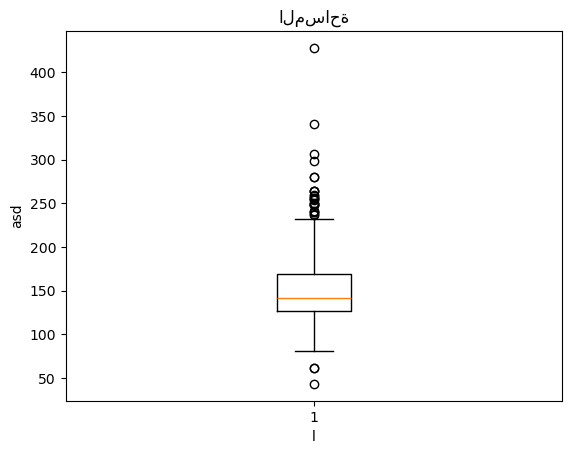

In [1136]:
plt.boxplot(df['المساحة'])

plt.title('المساحة')
plt.xlabel('l')
plt.ylabel('asd')
plt.show()

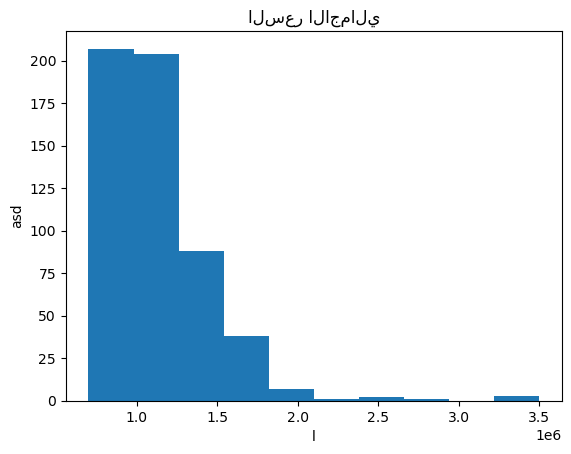

In [1142]:
plt.hist(df['السعر الاجمالي'])

plt.title('السعر الاجمالي')
plt.xlabel('l')
plt.ylabel('asd')
plt.show()

In [1144]:
import sweetviz as sv

In [1170]:
svreport = sv.analyze(df)
svreport.show_html("sweetviz_report.html")

                                             |          | [  0%]   00:00 -> (? left)

C:\Users\mosaa\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 1588 (\N{ARABIC LETTER SHEEN}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
C:\Users\mosaa\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Matplotlib currently does not support Arabic natively.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
C:\Users\mosaa\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 1602 (\N{ARABIC LETTER QAF}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
C:\Users\mosaa\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 1577 (\N{ARABIC LETTER TEH MARBUTA}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
C:\Users\mosaa\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 1588 (\N{ARABIC LETTER SHEEN}) missing from current font.
  figure.savefig(as_raw_bytes, format='png'

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [1150]:
df.columns

Index(['نوع العقار', 'المدينة', 'الحي', 'الواجهة', 'عدد الغرف', 'عدد الصالات',
       'عدد الحمامات', 'المساحة', 'مطبخ', 'مدخل سيارة', 'مصعد', 'الدور',
       'عمر العقار', 'مؤثثة', 'السعر الاجمالي', 'المنطقة'],
      dtype='object')

In [1156]:
!pip install arabic-reshaper

In [1160]:
!pip install python-bidi

   ---------------------------------------- 0.0/156.3 kB ? eta -:--:--
   -- ------------------------------------- 10.2/156.3 kB ? eta -:--:--
   ----- --------------------------------- 20.5/156.3 kB 131.3 kB/s eta 0:00:02
   ----- --------------------------------- 20.5/156.3 kB 131.3 kB/s eta 0:00:02
   ------- ------------------------------- 30.7/156.3 kB 131.3 kB/s eta 0:00:01
   ---------- ---------------------------- 41.0/156.3 kB 151.3 kB/s eta 0:00:01
   --------------- ----------------------- 61.4/156.3 kB 193.2 kB/s eta 0:00:01
   -------------------- ------------------ 81.9/156.3 kB 241.3 kB/s eta 0:00:01
   ----------------------------- -------- 122.9/156.3 kB 328.4 kB/s eta 0:00:01
   -------------------------------------- 156.3/156.3 kB 374.4 kB/s eta 0:00:00


In [1162]:
import arabic_reshaper 
from bidi.algorithm import get_display

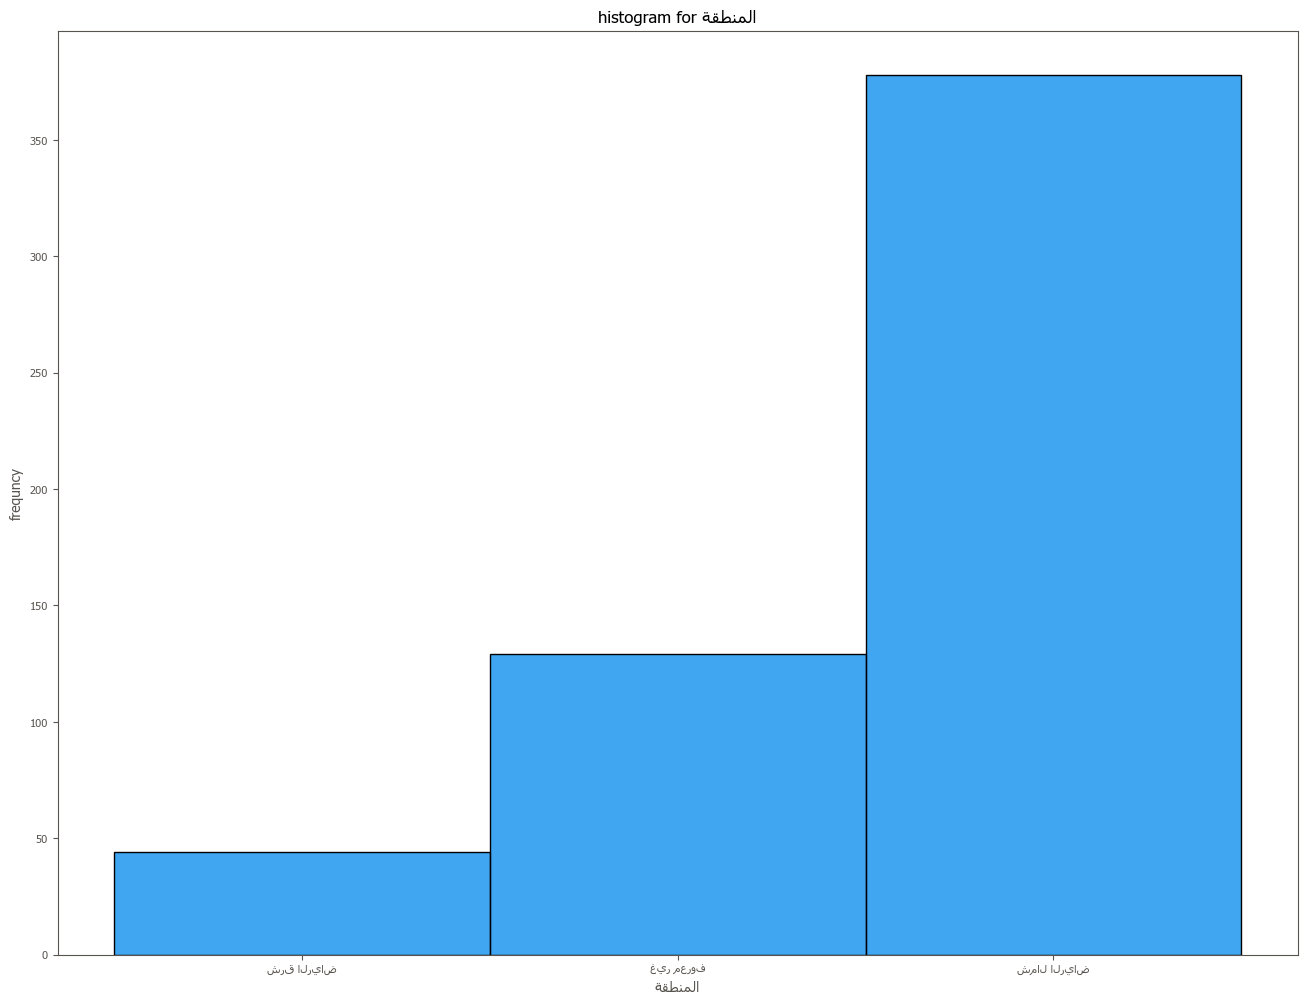

In [1194]:
newdf = df.copy()

l = ['المنطقة']

for i in l:
    plt.figure(figsize=(16, 12))
    sns.histplot(newdf[i],edgecolor='black')
    plt.title(f'histogram for {get_display(arabic_reshaper.reshape(i))}')
    plt.xlabel(get_display(arabic_reshaper.reshape(i)))
    plt.ylabel('frequncy')
    plt.show()

In [1166]:
df

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي,المنطقة
0,شقة,الرياض,حي المروج,جنوبية,4,1,3,249,1,0,1,3,0,0,1434000,شرق الرياض
1,شقة,الرياض,غير معروف,شمالية غربية,3,1,3,199,0,0,1,1,0,0,980000,غير معروف
2,شقة,الرياض,حي النرجس,غير معروف,3,1,3,145,1,0,1,0,2,0,1050000,شمال الرياض
3,شقة,الرياض,حي النرجس,شمالية,3,1,3,101,1,0,0,0,0,1,1200000,شمال الرياض
4,شقة,الرياض,حي الياسمين,شرقية,4,1,3,147,1,0,1,1,2,1,1200000,شمال الرياض
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,شقة,الرياض,حي الصحافة,غير معروف,3,1,3,201,1,0,1,1,9,0,1100000,شمال الرياض
547,شقة,الرياض,حي المروج,غير معروف,3,1,3,127,1,0,1,3,0,1,1600000,شرق الرياض
548,شقة,الرياض,حي الملقا,غربية,3,1,3,158,1,0,1,1,0,0,1398000,شمال الرياض
549,شقة,الرياض,حي القيروان,غير معروف,2,1,3,120,1,0,1,1,0,0,925000,شمال الرياض


In [1168]:
newdf

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي,المنطقة
0,شقة,الرياض,حي المروج,جنوبية,4,1,3,249,1,0,1,3,0,0,1434000,شرق الرياض
1,شقة,الرياض,غير معروف,شمالية غربية,3,1,3,199,0,0,1,1,0,0,980000,غير معروف
2,شقة,الرياض,حي النرجس,غير معروف,3,1,3,145,1,0,1,0,2,0,1050000,شمال الرياض
3,شقة,الرياض,حي النرجس,شمالية,3,1,3,101,1,0,0,0,0,1,1200000,شمال الرياض
4,شقة,الرياض,حي الياسمين,شرقية,4,1,3,147,1,0,1,1,2,1,1200000,شمال الرياض
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,شقة,الرياض,حي الصحافة,غير معروف,3,1,3,201,1,0,1,1,9,0,1100000,شمال الرياض
547,شقة,الرياض,حي المروج,غير معروف,3,1,3,127,1,0,1,3,0,1,1600000,شرق الرياض
548,شقة,الرياض,حي الملقا,غربية,3,1,3,158,1,0,1,1,0,0,1398000,شمال الرياض
549,شقة,الرياض,حي القيروان,غير معروف,2,1,3,120,1,0,1,1,0,0,925000,شمال الرياض


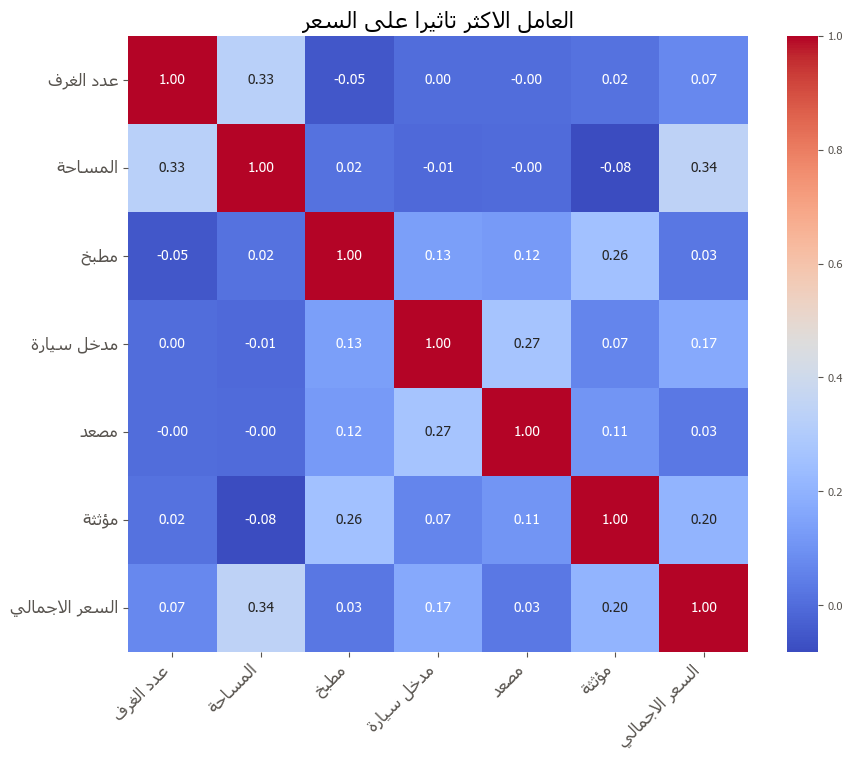

In [1192]:
df_numeric = newdf.select_dtypes(include=['int64', 'float64'])

correlation_matrix = df_numeric.corr()
=
def reshape_arabic_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)

reshaped_columns = [reshape_arabic_text(col) for col in df_numeric.columns]
correlation_matrix.columns = reshaped_columns
correlation_matrix.index = reshaped_columns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
plt.title(reshape_arabic_text("العامل الاكثر تاثيرا على السعر"), fontsize=16)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12, rotation=0)
plt.show()

In [ ]:
# the space is the most signficant factor that con impact the prices,
# meanwhile, most of the customers doesn't care if there is an elvator in the propraty they are intersted in.

In [ ]:
west = ['حي الشفا', 'حي طيبة', 'حي السويدي الغربي' , 'حي لبن', 'حي العريجاء الوسطى', 
        'حي العريجاء الغربية', 'حي الحزم', 'حي هجرة لبن', 
        'حي الرفيعة', 'حي العوالي', 'حي العريجاء الغربي', 
        'حي طويق', 'حي ظهرة البديعة', 'حي نمار', 
        'حي ظهرة لبن', 'حي المهدية']

In [1202]:
df['الحي'].unique()

array(['حي المروج', 'غير معروف', 'حي النرجس', 'حي الياسمين', 'حي العقيق',
       'حي القيروان', 'حي الملقا', 'حي النخيل', 'حي الصحافة', 'حي النفل',
       'حي حطين', 'حي الربيع', 'حي المصيف', 'حي العليا', 'حي الفلاح',
       'حي الندى', 'حي الملك فهد', 'حي الوادي', 'حي التعاون',
       'حي المغرزات', 'حي المرسلات', 'حي النزهة',
       'حي مطار الملك خالد الدولي'], dtype=object)

In [1200]:
df['المنطقة'].unique()

array(['شرق الرياض', 'غير معروف', 'شمال الرياض'], dtype=object)

In [1218]:
import plotly.express as px

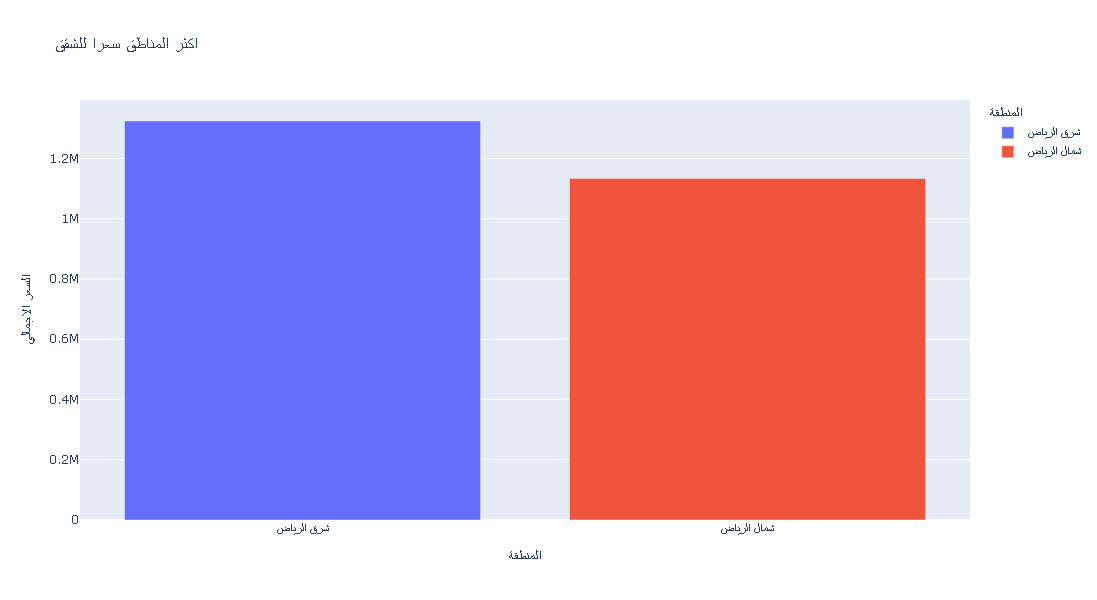

In [1248]:
df_filtered = df[df["المنطقة"] != "غير معروف"]

average_price_by_region = df_filtered.groupby("المنطقة")["السعر الاجمالي"].mean().reset_index()

fig = px.bar(
    average_price_by_region,
    x='المنطقة',
    y='السعر الاجمالي',
    title="اكثر المناطق سعرا للشقق",
    color='المنطقة',
    width=1000,  
    height=600 
)

fig.show()

In [ ]:
# most of the prices in riaydh are high and the east part has the biggest share

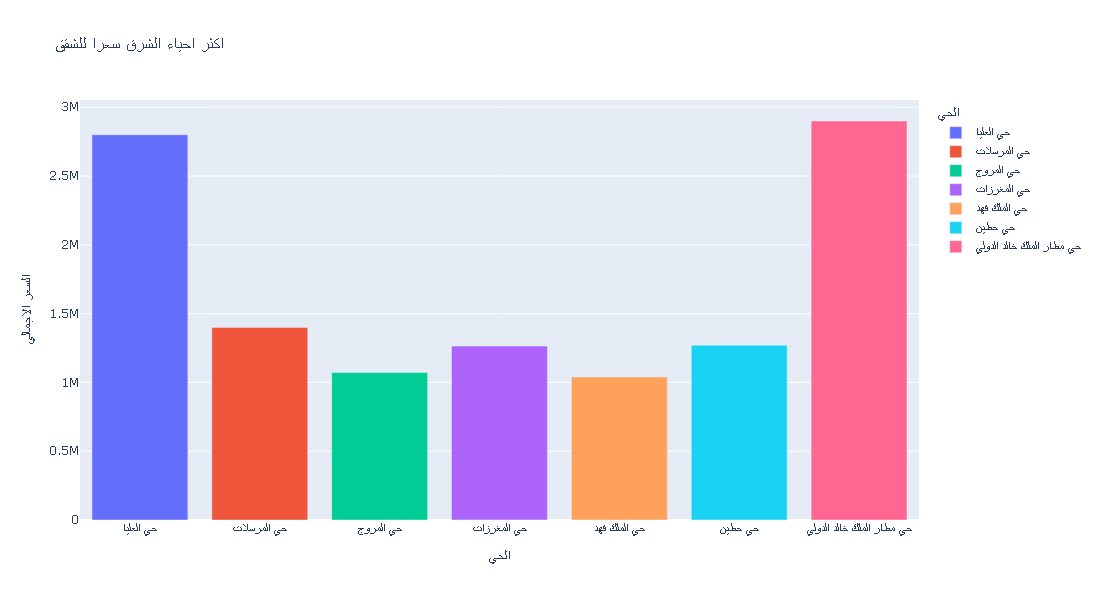

In [1284]:
df_filtered02 = df[(df["الحي"] != "غير معروف") & (df["المنطقة"] == "شرق الرياض")] 

average_price_by_nieghbrhood = df_filtered02.groupby("الحي")["السعر الاجمالي"].mean().reset_index()

fig = px.bar(
    average_price_by_nieghbrhood,
    x="الحي",
    y='السعر الاجمالي',
    title="اكثر احياء الشرق سعرا للشقق",
    color="الحي",
    width=1000,  
    height=600 
)

fig.show()

In [ ]:
# The king fahad niebrhood has the lowest prices becuase it is still under construction.

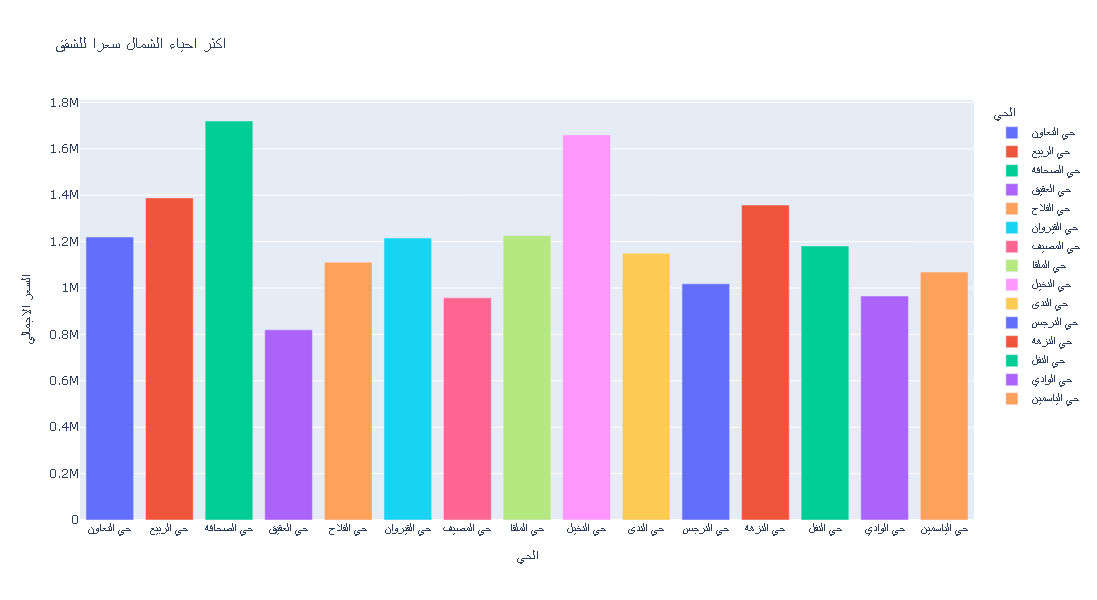

In [1282]:
df_filtered02 = df[(df["الحي"] != "غير معروف") & (df["المنطقة"] == "شمال الرياض")] 

average_price_by_nieghbrhood = df_filtered02.groupby("الحي")["السعر الاجمالي"].mean().reset_index()

fig = px.bar(
    average_price_by_nieghbrhood,
    x="الحي",
    y='السعر الاجمالي',
    title="اكثر احياء الشمال سعرا للشقق",
    color="الحي",
    width=1000,  
    height=600 
)

fig.show()

In [ ]:
# the high prices on alnakhel and alshafah niebrhoods are becuase they are near to KAFD and Boulevard World

In [1240]:
df_filtered

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي,المنطقة
0,شقة,الرياض,حي المروج,جنوبية,4,1,3,249,1,0,1,3,0,0,1434000,شرق الرياض
2,شقة,الرياض,حي النرجس,غير معروف,3,1,3,145,1,0,1,0,2,0,1050000,شمال الرياض
3,شقة,الرياض,حي النرجس,شمالية,3,1,3,101,1,0,0,0,0,1,1200000,شمال الرياض
4,شقة,الرياض,حي الياسمين,شرقية,4,1,3,147,1,0,1,1,2,1,1200000,شمال الرياض
5,شقة,الرياض,حي الياسمين,غير معروف,3,1,2,118,1,0,1,3,0,0,850000,شمال الرياض
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,شقة,الرياض,حي الصحافة,غير معروف,3,1,3,201,1,0,1,1,9,0,1100000,شمال الرياض
547,شقة,الرياض,حي المروج,غير معروف,3,1,3,127,1,0,1,3,0,1,1600000,شرق الرياض
548,شقة,الرياض,حي الملقا,غربية,3,1,3,158,1,0,1,1,0,0,1398000,شمال الرياض
549,شقة,الرياض,حي القيروان,غير معروف,2,1,3,120,1,0,1,1,0,0,925000,شمال الرياض


In [1290]:
df.columns

Index(['نوع العقار', 'المدينة', 'الحي', 'الواجهة', 'عدد الغرف', 'عدد الصالات',
       'عدد الحمامات', 'المساحة', 'مطبخ', 'مدخل سيارة', 'مصعد', 'الدور',
       'عمر العقار', 'مؤثثة', 'السعر الاجمالي', 'المنطقة'],
      dtype='object')

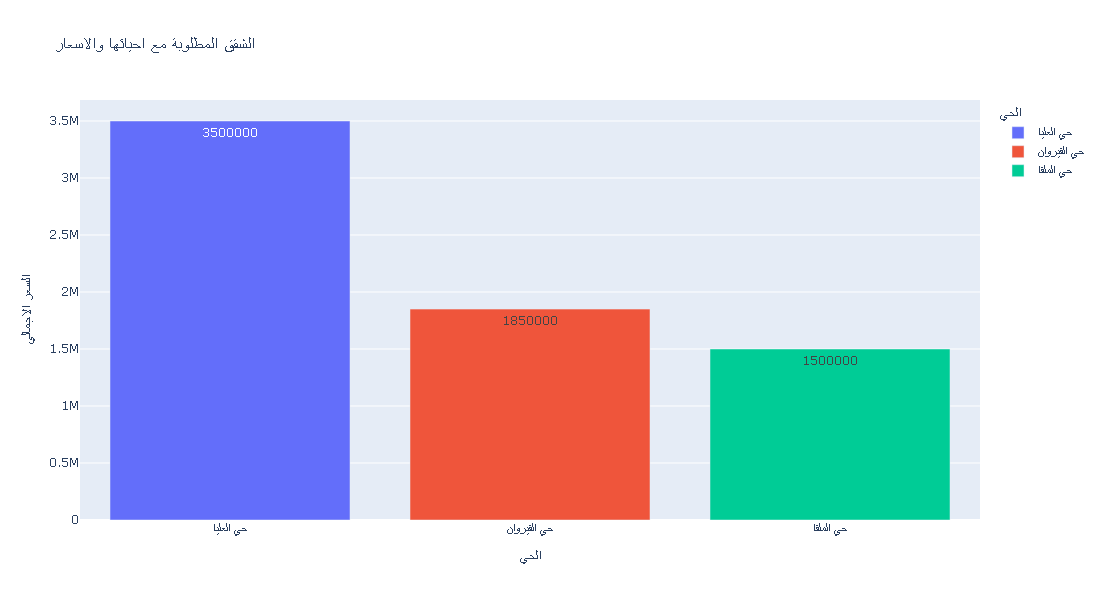

In [1360]:
df_filtered03 = df[(df["عدد الغرف"] >= 3) & (df["عدد الحمامات"] >= 3) & (df["مؤثثة"] == 1) & (df["مدخل سيارة"] == 1) & (df["الحي"] != "غير معروف") & (df["المساحة"] >= 200)] 

average_price_by_nieghbrhood = df_filtered03.groupby("الحي")["السعر الاجمالي"].mean().reset_index()

fig = px.bar(
    average_price_by_nieghbrhood,
    x="الحي",
    y='السعر الاجمالي',
    text='السعر الاجمالي',
    title = "  الشقق المطلوبة مع احيائها والاسعار",
    color="الحي",
    width=1000,  
    height=600 
)

fig.show()

In [ ]:
# for the streamlit story

In [1354]:
df_filtered03

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي,المنطقة
24,شقة,الرياض,حي القيروان,غير معروف,3,2,3,228,1,1,1,1,0,1,1850000,شمال الرياض
65,شقة,الرياض,حي العليا,ثلاث شوارع,4,2,5,217,1,1,1,-1,5,1,3500000,شرق الرياض
99,شقة,الرياض,حي الملقا,شرقية,4,2,4,232,1,1,1,3,1,1,1500000,شمال الرياض


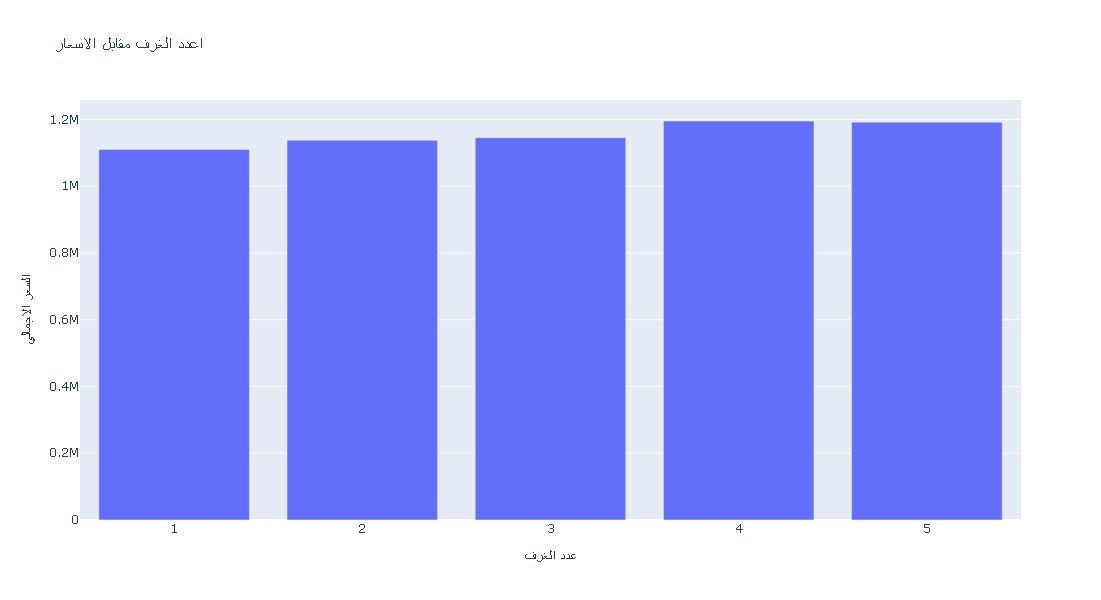

In [1372]:
df_filtered02 = df[(df["الحي"] != "غير معروف") & (df["المنطقة"] != "غير معروف")] 

average_price_by_nieghbrhood = df_filtered02.groupby("عدد الغرف")["السعر الاجمالي"].mean().reset_index()

fig = px.bar(
    average_price_by_nieghbrhood.head(),
    x="عدد الغرف",
    y='السعر الاجمالي',
    title="اعدد الغرف مقابل الاسعار",
    
    width=1000,  
    height=600 
)

fig.show()

In [ ]:
# there is no big diffrence on prices if the apartmnet include one room or six rooms, 
# so the impact on prices comes most from where it located or thier spce>

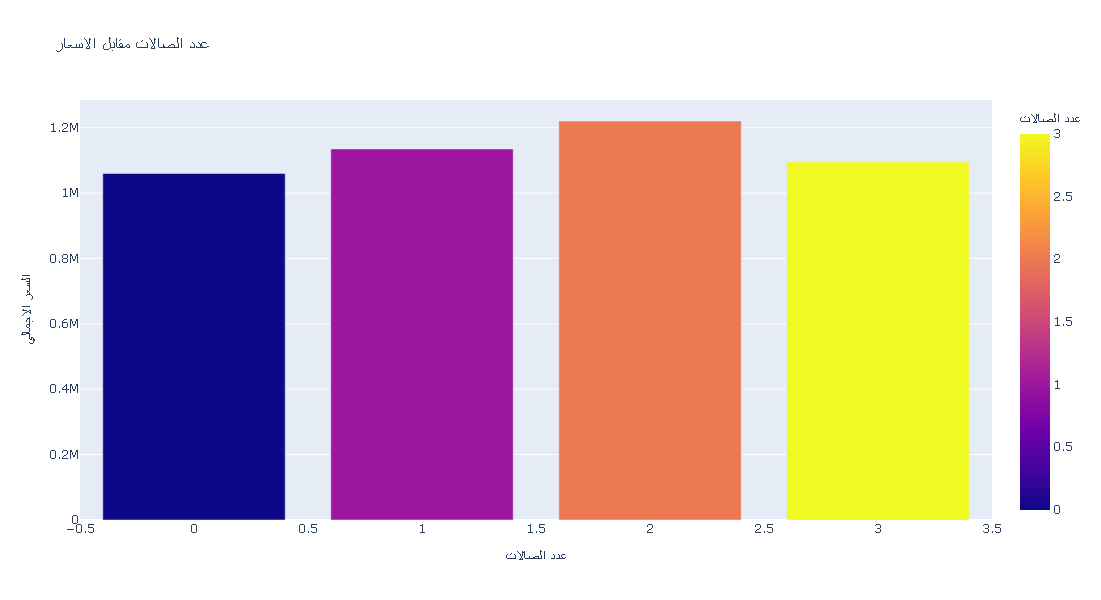

In [1380]:
df_filtered02 = df[(df["الحي"] != "غير معروف") & (df["المنطقة"] != "غير معروف")] 

average_price_by_nieghbrhood = df_filtered02.groupby("عدد الصالات")["السعر الاجمالي"].mean().reset_index()

fig = px.bar(
    average_price_by_nieghbrhood.head(),
    x="عدد الصالات",
    y='السعر الاجمالي',
    color = "عدد الصالات",
    title="عدد الصالات مقابل الاسعار",
    
    width=1000,  
    height=600 
)

fig.show()